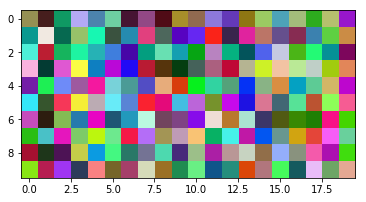

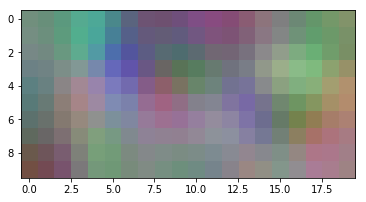

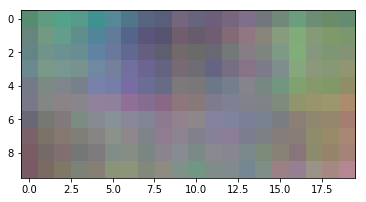

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

def background_lighting(img):
    # CoZmpute the integral of img
    simg = np.cumsum(np.cumsum(img, 0), 1)
    
    # Construct window-bounding integral indices for each pixel
    i_x, i_y = np.meshgrid(range(0,img.shape[1]), range(0,img.shape[0]))
    r = 2
    i0_x = np.maximum(i_x - r, 0)
    i0_y = np.maximum(i_y - r, 0)
    i1_x = np.minimum(i_x + r, img.shape[1]-1)
    i1_y = np.minimum(i_y + r, img.shape[0]-1)
    
    # Sum in window starts as the integral from (0,0) to the lower-right window pixel
    bg = simg[i1_y, i1_x, :]
    mask = i0_x > 0
    
    # ...but subtract the integral from (0,0) to the lower-left window pixel
    bg[mask, :] -= simg[i1_y, i0_x-1, :][mask, :]
    mask = i0_y > 0
    
    # ...and also subtract the integral from (0,0) to the upper-right window pixel
    bg[mask, :] -= simg[i0_y-1, i1_x, :][mask, :]
    
    # ...but then add back in the integral from (0,0) to the upper-left window pixel
    mask = np.logical_and(i0_x > 0, i0_y > 0)
    bg[mask, :] += simg[i0_y-1, i0_x-1, :][mask, :]
    
    # Divide sums-in-windows by actual window sizes
    area = np.zeros_like(bg)
    area[:,:,0] = (i1_y-i0_y+1) * (i1_x-i0_x+1)
    area[:,:,1] = area[:,:,0]
    area[:,:,2] = area[:,:,0]
    bg /= area
    
    return bg

img = np.random.rand(10,20,3)
imgb = cv2.GaussianBlur(img, (5, 5), 0)
imgl = background_lighting(img)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(imgb)
plt.figure()
plt.imshow(imgl)